In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import scipy
import seaborn as sns
import matplotlib.font_manager as fm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import random

In [25]:
warnings.simplefilter('ignore')

In [26]:
font_path = "C:\\Users\\spa84\\Downloads\\text_mining\\NanumGothic.ttf"  # 나눔 폰트의 경로를 지정
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc("font", family=font_name)

In [27]:
path = './data/'

df = pd.read_csv(path+'merged_target.csv')

In [28]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [29]:
# 랜덤 시드를 설정하여 결과를 재현 가능하게 만듭니다.
random.seed(42)

# DataFrame에서 무작위로 10,000개의 행을 선택합니다.
n_samples = 10000
random_rows = df.sample(n=n_samples)

# 선택된 행을 새로운 DataFrame으로 저장할 수도 있습니다.
df = pd.DataFrame(random_rows)

## Categorical:

- Nominal(variables that have two or more categories, but which do not have an intrinsic order.)

    - Region_Name : 자치구 명
    - Building_Use : 건물 용도
    
- Ordinal(variables that have two or more categories just like nominal variables. Only the categories can also be ordered or ranked.)

    
## Numeric:

- Discrete
    - YearMonth : 년월
    - Building_Age : 건물연식
    - JS_Price : 전세가
   
- Continous
    - Sell_Price : 매매 가격
    - JS_BA = JS_Building Area : 임대 면적
    - lR = Interest Rate : 금리
    - UR = Unemployment Rate : 실업률
    - LC_index = Leading Composite index : 선행종합 지수
    - CA_index = Comprehensive Accompany index : 동행종합 지수
    - TC_index = Trailing Composite index : 후행종합 지수
    - SDT_index = Supply and Demand Trend index = 전세수급동향 지수
    - HSP_index = 
    - Population : 인구수
    - Crime_Rates : 범죄율
    - Shortest_Distance_to_Subway : 가장 가까운 지하철역과의 거리
    - Shortest_Distance_to_School : 가장 가까운 초중고등학교와의 거리
    - Shortest_Distance_to_Univ : 가장 가까운 대학교와의 거리
    - Shortest_Distance_to_Park : 가장 가까운 공원과의 거리
    

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 79281 to 149106
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Building_Age                     10000 non-null  int64  
 1   JS_Price                         10000 non-null  int64  
 2   JS_BA                            10000 non-null  float64
 3   Population                       10000 non-null  int64  
 4   UR                               10000 non-null  float64
 5   LC_index                         10000 non-null  float64
 6   CA_index                         10000 non-null  float64
 7   TC_index                         10000 non-null  float64
 8   SDT_index                        10000 non-null  float64
 9   HSP_index                        10000 non-null  float64
 10  Sell_Price                       10000 non-null  float64
 11  Crime_Rates                      10000 non-null  float64
 12  IR           

## 데이터전처리

### 종속변수 변환

In [31]:
# JS_Price를 4개의 범주로 나누고 기존 변수 삭제
df['JS_Price_Category'] = pd.cut(df['JS_Price'], bins=5, labels=False)
df.drop('JS_Price', axis=1, inplace=True)

### 인코딩

In [32]:
# # 범주형 변수 더미화 함수, 범주형 변수의 범주 레벨 간의 관계가 중요할 시 사용
# def oh_encoding(df):
#     # DataFrame의 복사본을 만듭니다.
#     df_encoded = df.copy()
#     columns_encoded = []
#     for column in df.columns:
#         if df[column].dtype == object:
#             df_encoded = pd.get_dummies(df_encoded, columns=[column], prefix=column)
#             columns_encoded.append(column)
#     return df_encoded, columns_encoded

In [33]:
# df_encoded, columns_encoded = oh_encoding(df)

In [34]:
df_encoded = df

In [35]:
df_encoded

,Building_Age,JS_BA,Population,UR,LC_index,CA_index,TC_index,SDT_index,HSP_index,Sell_Price,Crime_Rates,IR,Region_Name,Building_Use,YearMonth,Shortest_Distance_to_Subway,Shortest_Distance_to_University,Shortest_Distance_to_School,JS_Price_Category
79281,1,19.87,592308,4.5,93.9,98.0,94.1,94.786910,106.1,17000.00,0.766885,1.50,17243.996862,18749.306885,18281.567268,1153.459382,1800.089389,513.248536,0
219964,24,84.98,566839,3.1,109.3,108.7,112.9,67.895425,146.2,69750.00,0.825560,3.50,30605.677721,36298.957205,46075.090764,1700.332594,1393.171892,145.505582,1
161939,27,79.72,377432,3.0,81.4,86.6,84.9,115.756491,77.5,31950.00,1.661700,2.00,36881.931806,36298.957205,33219.472543,285.283656,2620.705849,111.978288,0
21215,24,61.28,480967,3.3,93.1,97.2,93.3,100.190259,100.9,26300.00,0.790510,1.50,17222.396732,19873.401378,19578.693182,215.456242,2501.377498,394.884214,0
122021,8,29.49,522782,2.4,109.4,109.2,110.8,85.521029,164.0,22500.00,1.138753,2.50,20584.917492,18749.306885,19840.858557,1510.184997,5524.502371,255.746079,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65536,1,24.22,377446,3.0,81.4,86.6,84.9,115.756491,77.5,13600.00,1.450117,2.00,18344.353193,18749.306885,15670.075758,2021.912356,2974.796971,283.938035,0
170014,14,114.73,355274,3.1,85.2,90.7,87.4,122.786225,84.4,31573.53,1.262626,1.50,34182.781979,36298.957205,35931.081203,1373.655200,652.573629,256.420945,1
152539,27,93.02,489072,2.6,78.3,84.5,82.1,119.385885,74.5,51962.50,1.178894,2.50,38158.999820,36298.957205,30375.168852,915.321142,2350.219621,449.220810,1
26947,10,40.69,332026,4.5,94.8,99.0,96.7,78.901961,117.9,14800.00,0.628667,1.75,14950.504399,19873.401378,19465.818713,967.785046,3555.982079,533.326581,0


## 오버샘플링
- 클래스 별 샘플 수 차이로 인해 오버샘플링 진행

In [36]:
df_encoded['JS_Price_Category'].value_counts()

0    8332
1    1470
2     171
3      23
4       4
Name: JS_Price_Category, dtype: int64

In [37]:
from imblearn.over_sampling import RandomOverSampler

# 오버샘플링할 데이터와 레이블을 준비합니다.
X = df_encoded.drop('JS_Price_Category', axis=1)  # 독립변수
y = df_encoded['JS_Price_Category']  # 종속변수

# RandomOverSampler를 초기화합니다.
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# 오버샘플링을 적용합니다.
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# 오버샘플링된 데이터를 새로운 데이터프레임으로 만듭니다.
df_encoded = pd.concat([X_resampled, y_resampled], axis=1)

In [38]:
df_encoded

,Building_Age,JS_BA,Population,UR,LC_index,CA_index,TC_index,SDT_index,HSP_index,Sell_Price,Crime_Rates,IR,Region_Name,Building_Use,YearMonth,Shortest_Distance_to_Subway,Shortest_Distance_to_University,Shortest_Distance_to_School,JS_Price_Category
0,1,19.87,592308,4.5,93.9,98.0,94.1,94.786910,106.1,17000.00,0.766885,1.5,17243.996862,18749.306885,18281.567268,1153.459382,1800.089389,513.248536,0
1,24,84.98,566839,3.1,109.3,108.7,112.9,67.895425,146.2,69750.00,0.825560,3.5,30605.677721,36298.957205,46075.090764,1700.332594,1393.171892,145.505582,1
2,27,79.72,377432,3.0,81.4,86.6,84.9,115.756491,77.5,31950.00,1.661700,2.0,36881.931806,36298.957205,33219.472543,285.283656,2620.705849,111.978288,0
3,24,61.28,480967,3.3,93.1,97.2,93.3,100.190259,100.9,26300.00,0.790510,1.5,17222.396732,19873.401378,19578.693182,215.456242,2501.377498,394.884214,0
4,8,29.49,522782,2.4,109.4,109.2,110.8,85.521029,164.0,22500.00,1.138753,2.5,20584.917492,18749.306885,19840.858557,1510.184997,5524.502371,255.746079,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41655,6,244.54,441511,3.2,85.4,90.9,87.8,121.310376,84.4,178081.25,1.206405,1.5,51156.808671,36298.957205,38506.037037,734.422845,1061.260557,80.637446,4
41656,12,134.90,537081,4.1,93.8,98.1,94.4,89.535769,107.4,175000.00,1.372355,1.5,46291.251616,36298.957205,38005.682331,720.683304,3050.363107,200.107152,4
41657,3,84.81,291841,3.1,100.4,99.3,100.2,120.709631,151.9,97000.00,0.786010,0.5,45044.494431,36298.957205,44500.862175,1120.985079,2113.720174,256.250622,4
41658,12,134.90,537081,4.1,93.8,98.1,94.4,89.535769,107.4,175000.00,1.372355,1.5,46291.251616,36298.957205,38005.682331,720.683304,3050.363107,200.107152,4


## Logistic Regression Analysis

In [39]:
selected_features = ['Region_Name',
 'JS_BA',
 'Building_Use',
 'Building_Age',
 'SDT_index',
 'Crime_Rates',
 'Shortest_Distance_to_School',
 'Sell_Price',
 'HSP_index',
 'YearMonth',
 'Shortest_Distance_to_Subway']

In [40]:
# 독립 변수 선택
X = df_encoded[selected_features]

# 종속 변수 선택 (JS_Price_Category, 다중 분류)
Y = df_encoded['JS_Price_Category']

# 층화 추출을 사용하여 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# 표준화 (선택적)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 다항 로지스틱 회귀 모델 생성
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, Y_train)

# 모델 평가 (정확도 계산)
accuracy = model.score(X_test, Y_test)
print(f"모델 정확도 : {accuracy}", '\n')

# 각 클래스에 속할 확률 예측
probabilities = model.predict_proba(X_test)

# 예측 결과 클래스 (가장 높은 확률을 갖는 클래스 선택)
predicted_classes = model.predict(X_test)

# 예측된 클래스 및 확률 출력
print("---예측된 클래스---", '\n', predicted_classes, '\n')
print("---클래스별 확률---", '\n', probabilities)

모델 정확도 : 0.8150504080652905 

---예측된 클래스--- 
 [2 3 1 ... 4 3 3] 

---클래스별 확률--- 
 [[7.74153394e-05 2.11374934e-01 7.53598940e-01 3.49355495e-02
  1.31610972e-05]
 [1.15534933e-13 7.56672442e-07 4.04297018e-03 9.94443319e-01
  1.51295403e-03]
 [4.25948973e-03 7.59828054e-01 2.34701967e-01 6.43682986e-04
  5.66806544e-04]
 ...
 [7.06065341e-24 2.24237568e-14 2.82441037e-07 4.27631565e-02
  9.57236561e-01]
 [5.17163829e-12 1.76755010e-05 3.26545151e-02 8.61503550e-01
  1.05824259e-01]
 [9.06688923e-10 5.92095463e-04 2.33090323e-01 7.58566425e-01
  7.75115569e-03]]


### 로지스틱 회귀 분석의 통계량
- 양수 회귀 계수는 종속 변수를 증가시키는 데 긍정적인 영향을 미치고, 음수 회귀 계수는 종속 변수를 감소시키는 데 부정적인 영향을 미칩니다.
- 오즈비가 1보다 크면 해당 독립 변수가 종속 변수의 확률에 긍정적인 영향을 미칩니다. 오즈비가 1보다 작으면 부정적인 영향을 미칩니다.

In [41]:
# 회귀 모델을 이미 만들었다고 가정합니다.
# model은 이미 다중 클래스 로지스틱 회귀 모델로 훈련되어 있다고 가정합니다.

# 독립 변수의 열 이름
independent_variable_names = selected_features 

# 종속 변수 열의 이름을 식별하고 고유한 클래스 값을 확인합니다.
dependent_variable_column = "JS_Price_Category"
dependent_variable_classes = df_encoded[dependent_variable_column].unique()

# 회귀 계수 출력
coefficients = model.coef_

# 각 독립 변수와 종속 변수 클래스에 대한 회귀 계수와 오즈비를 출력합니다.
for i, dep_class in enumerate(dependent_variable_classes):
    print(f"종속 변수 클래스: {dep_class}")
    for j, indep_var in enumerate(independent_variable_names):
        coef = coefficients[i][j]
        odds_ratio = np.exp(coef)
        print(f"{indep_var} - 회귀 계수: {coef}, 오즈비: {odds_ratio}")

종속 변수 클래스: 0
Region_Name - 회귀 계수: -3.6296507854963562, 오즈비: 0.02652544586209383
JS_BA - 회귀 계수: -8.126552395605943, 오즈비: 0.00029558550805808357
Building_Use - 회귀 계수: 0.8091775337244622, 오즈비: 2.24605991825807
Building_Age - 회귀 계수: 2.299013701664088, 오즈비: 9.96434978502747
SDT_index - 회귀 계수: -0.4380346381714433, 오즈비: 0.6453034303393186
Crime_Rates - 회귀 계수: -0.34616328780906847, 오즈비: 0.7073969683742505
Shortest_Distance_to_School - 회귀 계수: 0.7275829905426616, 오즈비: 2.070071174582945
Sell_Price - 회귀 계수: -4.203557649131053, 오즈비: 0.01494232260570743
HSP_index - 회귀 계수: -0.6571646725274125, 오즈비: 0.5183188567495868
YearMonth - 회귀 계수: -3.5233894811365003, 오즈비: 0.029499278276574645
Shortest_Distance_to_Subway - 회귀 계수: -0.2325067936495593, 오즈비: 0.7925443650598122
종속 변수 클래스: 1
Region_Name - 회귀 계수: -2.467032877784808, 오즈비: 0.08483620531899771
JS_BA - 회귀 계수: -3.537787454279423, 오즈비: 0.029077591462595954
Building_Use - 회귀 계수: -0.8149795517450333, 오즈비: 0.44264837865571655
Building_Age - 회귀 계수: 1.4203813076

## 변수선택법
- SelectFromModel로 유의한 순서대로 변수 8개 선택

In [42]:
# 로지스틱 회귀 모델을 사용하여 변수 선택
model = LogisticRegression(max_iter=1000)  # 로지스틱 회귀 모델 생성 (다른 모델로 변경 가능)

# SelectFromModel을 사용하여 변수 선택
sfm = SelectFromModel(model, threshold=-np.inf, max_features=8)

# 변수 선택 모델을 훈련 데이터에 맞춤
sfm.fit(X, Y)

# 선택된 변수 인덱스를 가져옴
selected_feature_indices = sfm.get_support(indices=True)

# 선택된 변수 이름 가져오기 (X.columns 활용)
selected_features = X.columns[selected_feature_indices]

# 선택된 변수 출력
print("선택된 변수:")
print(selected_features)

선택된 변수:
Index(['Region_Name', 'JS_BA', 'Building_Use', 'Building_Age', 'SDT_index',
       'Shortest_Distance_to_School', 'HSP_index',
       'Shortest_Distance_to_Subway'],
      dtype='object')


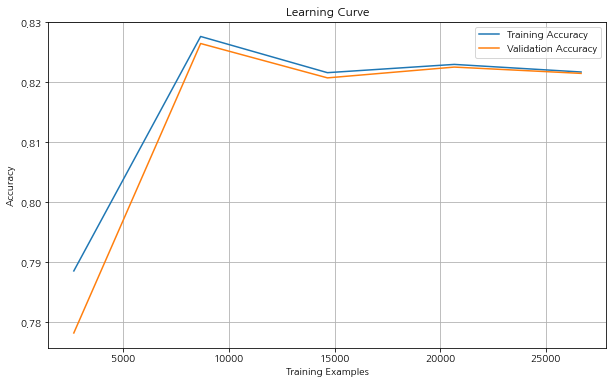

In [43]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 학습 곡선 생성
train_sizes, train_scores, test_scores = learning_curve(model, X_train, Y_train, cv=5)

# 평균 정확도 계산
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# 학습 곡선 그리기
plt.figure(figsize=(10, 6))
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.grid()

plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')
plt.legend(loc='best')

plt.show()


In [44]:
# 회귀 모델을 이미 만들었다고 가정합니다.
# model은 이미 다중 클래스 로지스틱 회귀 모델로 훈련되어 있다고 가정합니다.

# 독립 변수의 열 이름
independent_variable_names = selected_features 

# 종속 변수 열의 이름을 식별하고 고유한 클래스 값을 확인합니다.
dependent_variable_column = "JS_Price_Category"
dependent_variable_classes = df_encoded[dependent_variable_column].unique()

# 회귀 계수 출력
coefficients = model.coef_

# 각 독립 변수와 종속 변수 클래스에 대한 회귀 계수와 오즈비를 출력합니다.
for i, dep_class in enumerate(dependent_variable_classes):
    print(f"종속 변수 클래스: {dep_class}")
    for j, indep_var in enumerate(independent_variable_names):
        coef = coefficients[i][j]
        odds_ratio = np.exp(coef)
        print(f"{indep_var} - 회귀 계수: {coef}, 오즈비: {odds_ratio}")

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

## 과적합 체크

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 학습 곡선 생성
train_sizes, train_scores, test_scores = learning_curve(model, X_train, Y_train, cv=5)

# 평균 정확도 계산
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# 학습 곡선 그리기
plt.figure(figsize=(10, 6))
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.grid()

plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')
plt.legend(loc='best')

plt.show()


## 변수선택법
- p-value로 최종선택

In [ ]:
# 로지스틱 회귀 모델 생성 (다항 로지스틱 회귀 모델)
model = sm.MNLogit(Y, sm.add_constant(X))  # 상수항 추가

# 모델 피팅
result = model.fit()

# 독립 변수들의 p-value 추출
p_values = result.pvalues
p_values

- p-value값을 고려하여 종속변수의 모든 클래스에 대해 통계적으로 유의한 변수만을 사용한다.
- 최종적으로 Building_Use제거